<a href="https://colab.research.google.com/github/facundozubeldia-cloud/Portfolio-FZ/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tenemos:
- Etiqueta/label/Y: Setosa/Versicolor/Virginica (Variable dependiente, variable objetivo).
- Columnas/X/features: Largo y ancho del pétalo, largo y ancho del sépalo (4)

Dicho esto, no podemos ver las 4 dimensiones en simultaneo. Necesitamos un modelo 2D (como una hoja) o 3D (cubo).

De todos los angulos posibles desde donde puedo mirar el grupo de flores, PCA me elige el que mejor muestra como se separan.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
plt.style.use('dark_background')

In [ ]:
iris = load_iris()

In [ ]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [ ]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Aplicamos PCA:

In [ ]:
pca_scaled = PCA()

In [ ]:
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

In [ ]:
X_pca_scaled

Guardamos la varianza explicada y la varianza explicada acumulada en dos variables distintas para poderlas graficar y asi entender el tema:

In [ ]:
explanied_variance_scaled = pca_scaled.explained_variance_ratio_
cumulative_variance_scaled = np.cumsum(explanied_variance_scaled)

In [ ]:
X

In [ ]:
explained_variance_scaled, cumulative_variance_scaled

(array([0.72962445, 0.22850762, 0.03668922, 0.00517871]),
 array([0.72962445, 0.95813207, 0.99482129, 1.        ]))

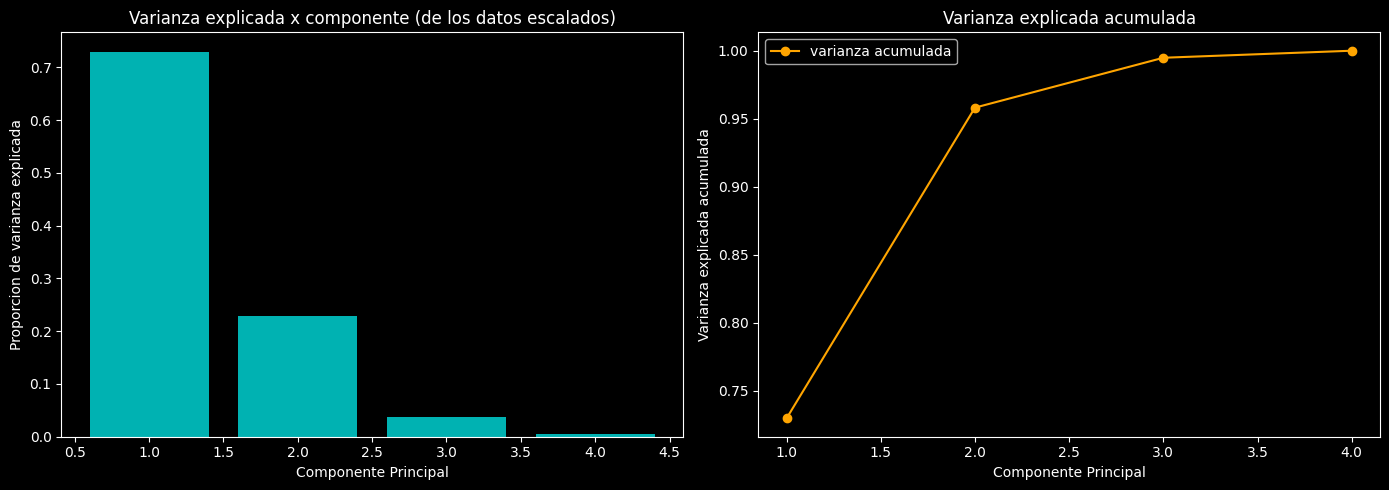

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
ax[0].bar(range(1, len(explanied_variance_scaled) + 1), explanied_variance_scaled, alpha = 0.7, color = 'cyan', label = "varianza explicada")
ax[0].set_xlabel('Componente Principal')
ax[0].set_ylabel('Proporcion de varianza explicada')
ax[0].set_title('Varianza explicada x componente (de los datos escalados)')

ax[1].plot(range(1, len(cumulative_variance_scaled) + 1), cumulative_variance_scaled, marker = 'o', linestyle='-', color = 'orange', label = "varianza acumulada")
ax[1].set_xlabel('Componente Principal')
ax[1].set_ylabel('Varianza explicada acumulada')
ax[1].set_title('Varianza explicada acumulada')
ax[1].legend()

plt.tight_layout()
plt.show()

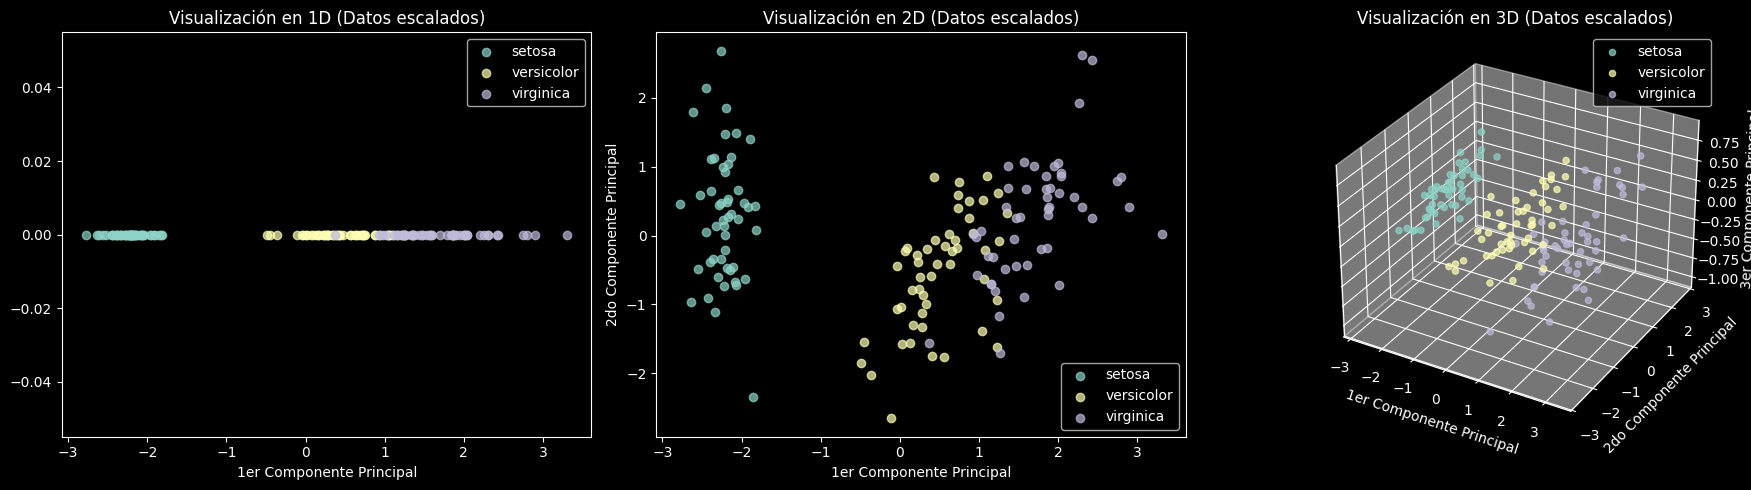

In [ ]:
fig = plt.figure(figsize=(18, 5))

# Visualización en 1D
ax1 = fig.add_subplot(1, 3, 1)
for i, target_name in zip([0, 1, 2], target_names):
    ax1.scatter(X_pca_scaled[y == i, 0], [0] * sum(y == i), alpha=0.7, label=target_name)
ax1.set_xlabel('1er Componente Principal')
ax1.set_title('Visualización en 1D (Datos escalados)')
ax1.legend()

# Visualización en 2D
ax2 = fig.add_subplot(1, 3, 2)
for i, target_name in zip([0, 1, 2], target_names):
    ax2.scatter(X_pca_scaled[y == i, 0], X_pca_scaled[y == i, 1], alpha=0.7, label=target_name)
ax2.set_xlabel('1er Componente Principal')
ax2.set_ylabel('2do Componente Principal')
ax2.set_title('Visualización en 2D (Datos escalados)')
ax2.legend()

# Visualización en 3D
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
for i, target_name in zip([0, 1, 2], target_names):
    ax3.scatter(X_pca_scaled[y == i, 0], X_pca_scaled[y == i, 1], X_pca_scaled[y == i, 2], alpha=0.7, label=target_name)
ax3.set_xlabel('1er Componente Principal')
ax3.set_ylabel('2do Componente Principal')
ax3.set_zlabel('3er Componente Principal')
ax3.set_title('Visualización en 3D (Datos escalados)')
ax3.legend()

plt.tight_layout()
plt.show()